In [1]:
import train as train
import generate
import eval
from modules.config import read_config
import modules.plots as plots
from modules.datageneration import load_data, data_functions
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
BASE_DIR = "./experiments/pipeline-test"
PROFILE = "sin-10x"

In [3]:
configs = read_config(f"{BASE_DIR}/config.ini")
dataset_configs = read_config(f"{BASE_DIR}/dataset_config.ini")

config = configs[PROFILE]
NAME = config["NAME"]
dataset_config = dataset_configs[config["DATASET"]]
DATASET_NAME = dataset_config["NAME"]

====== Generating profile sin-10x-10k ======


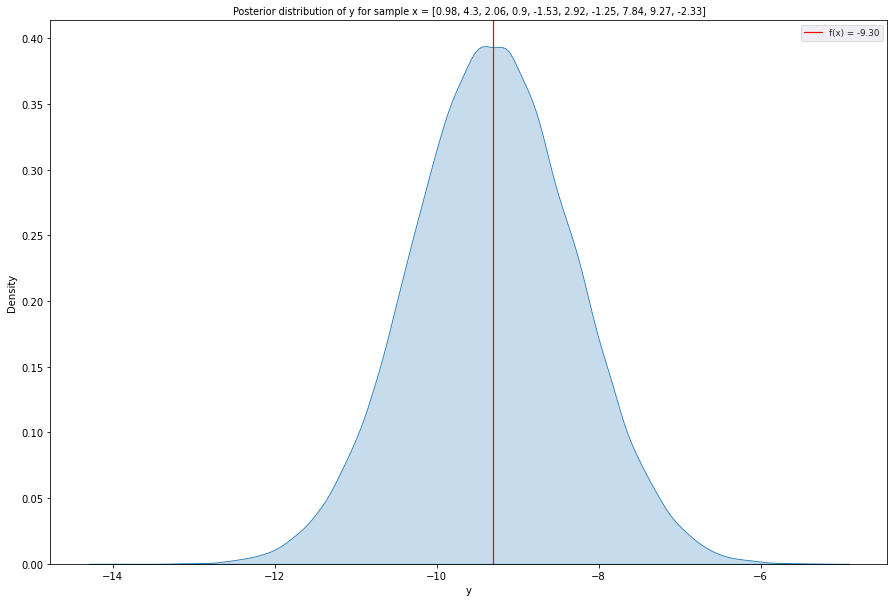

In [4]:
if True:
    if not os.path.exists(f"{BASE_DIR}/datasets"):
                os.mkdir(f"{BASE_DIR}/datasets")
    generate.gen(dataset_config, f"{BASE_DIR}/datasets")

In [5]:
(x_train, y_train), (x_val, y_val), (x_test, y_test), (x_test_in_domain, y_test_in_domain), (x_test_out_domain, y_test_out_domain) = load_data(f"{BASE_DIR}/datasets/{DATASET_NAME}")

In [6]:
x_train[0], y_train[0]

(tensor([ 0.9763,  4.3038,  2.0553,  0.8977, -1.5269,  2.9179, -1.2483,  7.8355,
          9.2733, -2.3312]),
 tensor(-8.3934))

In [7]:
#Min y and max y of the train data
y_min = y_train.min()
y_max = y_train.max()
print(f"Train Data: | y_min: {y_min}, y_max: {y_max}")

#Min y and max y of the train data
y_min = y_test_in_domain.min()
y_max = y_test_in_domain.max()
print(f"Test Data in domain: | y_min: {y_min}, y_max: {y_max}")

#Min y and max y of the train data
y_min = y_test_out_domain.min()
y_max = y_test_out_domain.max()
print(f"Test data out domain: | y_min: {y_min}, y_max: {y_max}")

Train Data: | y_min: -29.312437057495117, y_max: 31.848068237304688
Test Data in domain: | y_min: -28.7713680267334, y_max: 25.73395538330078
Test data out domain: | y_min: -31.30309295654297, y_max: 28.065248489379883
